In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from src.lfw import LFW
from src.eval import Eval

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
lfw = LFW('/storage/lfw', test_sample=0.2, limit_to_A=False)
lfw_limit = LFW('/storage/lfw', test_sample=0.2, limit_to_A=True)

In [3]:
evaluator = Eval(train_data=lfw.train_data, test_data=lfw.test_data)
evaluator_limit = Eval(train_data=lfw_limit.train_data, test_data=lfw_limit.test_data)

# Simple Autoencoder (AE)

In [114]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # input: batch x 3 x 224 x 224 -> batch x _ x 7 x 7
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=3, padding=2),  # b, 32, 76, 76
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # b, 32, 38, 38
            nn.Conv2d(32, 64, 3, stride=3, padding=2),  # b, 64, 14, 14
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # b, 64, 7, 7
            nn.Conv2d(64, 128, 3, stride=1, padding=1),  # b, 128, 7, 7
        )
        
        self.fc_down = nn.Linear(128*7*7, 200)
        self.fc_up = nn.Linear(200, 128*7*7)

        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=3),  # b, 64, 10, 10
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1),  # b, 32, 17, 17
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 6, stride=2, padding=0),  # b, 16, 38, 38
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 4, stride=2, padding=1),  # b, 8, 76, 76
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 3, 3, stride=3, padding=2),  # b, 3, 224, 224
            nn.Sigmoid()
        )
        
    def encode(self, x):
        out = self.encoder(x)
        out = out.view(-1, 128*7*7)
        return self.fc_down(out)
    
    def decode(self, x):
        out = self.fc_up(x)
        out = out.view(-1, 128, 7, 7)
        return self.decoder(out)
        
    def forward(self, x):
        out = self.encoder(x)
        out = self.decoder(out)
        return out

In [117]:
class AutoRepEval:
    def __init__(self, model):
        self.model = model

    def eval(self):
        self.model.eval()
    
    def __call__(self, image):
        out = self.model.encode(image)
        return out

Epoch 1
Loss: 48.4081
Val Loss: 40.8220
Epoch 2
Loss: 40.6478
Val Loss: 33.0176
Epoch 3
Loss: 33.2164
Val Loss: 26.8526
Epoch 4
Loss: 28.7316
Val Loss: 25.4255
Epoch 5
Loss: 26.9676
Val Loss: 22.9438
ACC: 9.048%


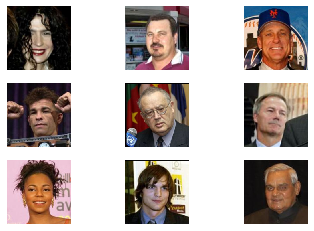

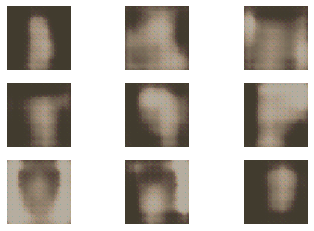

Epoch 6
Loss: 25.6656
Val Loss: 23.2500
Epoch 7
Loss: 25.5444
Val Loss: 21.5950
Epoch 8
Loss: 24.9120
Val Loss: 21.2025
Epoch 9
Loss: 23.6085
Val Loss: 21.2403
Epoch 10
Loss: 23.5947
Val Loss: 19.9852
ACC: 8.571%


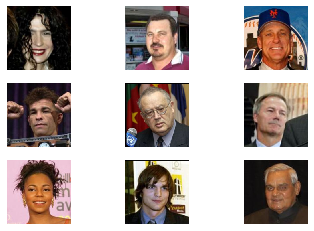

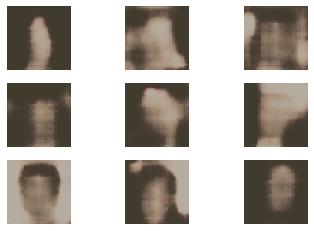

Epoch 11
Loss: 22.6334
Val Loss: 19.5960
Epoch 12
Loss: 22.1278
Val Loss: 19.0706
Epoch 13
Loss: 21.4093
Val Loss: 18.4437
Epoch 14
Loss: 20.8308
Val Loss: 18.0935
Epoch 15
Loss: 20.9585
Val Loss: 17.8634
ACC: 8.571%


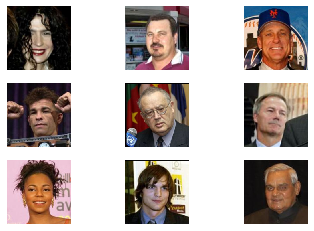

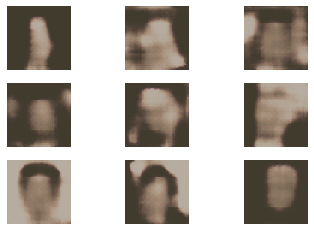

Epoch 16
Loss: 20.3193
Val Loss: 18.0797
Epoch 17
Loss: 20.3092
Val Loss: 17.4951
Epoch 18
Loss: 19.9119
Val Loss: 17.2962
Epoch 19
Loss: 19.8093
Val Loss: 17.1316
Epoch 20
Loss: 19.4380
Val Loss: 16.9392
ACC: 9.524%


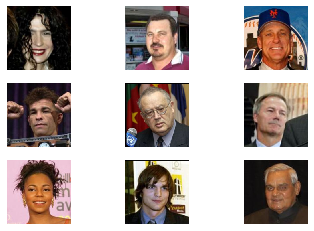

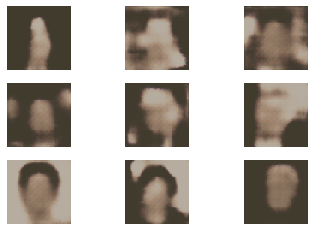

Epoch 21
Loss: 19.4118
Val Loss: 16.8531
Epoch 22
Loss: 18.7606
Val Loss: 16.7378
Epoch 23
Loss: 19.2843
Val Loss: 16.5323
Epoch 24
Loss: 19.6507
Val Loss: 16.6269
Epoch 25
Loss: 19.1328
Val Loss: 16.3746
ACC: 8.571%


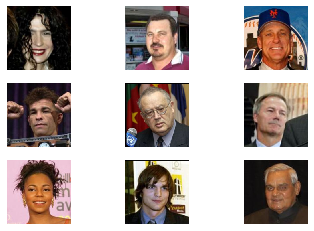

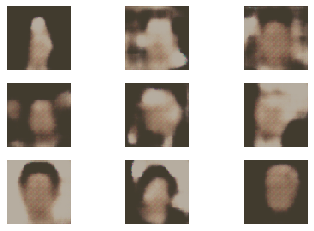

Epoch 26
Loss: 18.8534
Val Loss: 16.1587
Epoch 27
Loss: 18.7443
Val Loss: 16.0344
Epoch 28
Loss: 18.1661
Val Loss: 15.9335
Epoch 29
Loss: 18.2513
Val Loss: 15.5618
Epoch 30
Loss: 17.7371
Val Loss: 15.3687
ACC: 10.476%


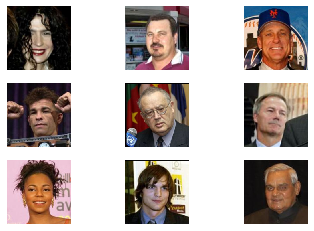

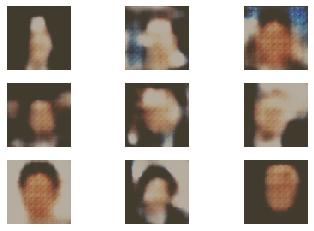

Epoch 31
Loss: 17.5147
Val Loss: 15.2235
Epoch 32
Loss: 17.4709
Val Loss: 15.0599
Epoch 33
Loss: 17.4133
Val Loss: 14.8557
Epoch 34
Loss: 16.9951
Val Loss: 14.9057
Epoch 35
Loss: 17.2493
Val Loss: 14.7099
ACC: 10.000%


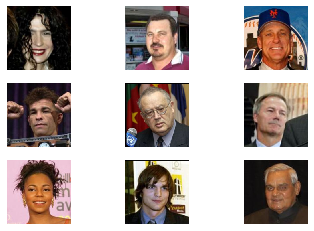

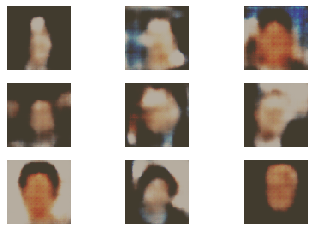

Epoch 36
Loss: 16.9929
Val Loss: 14.6310
Epoch 37
Loss: 16.9018
Val Loss: 14.6146
Epoch 38
Loss: 16.5738
Val Loss: 14.5916
Epoch 39
Loss: 16.6400
Val Loss: 14.5114
Epoch 40
Loss: 16.7074
Val Loss: 14.3552
ACC: 10.000%


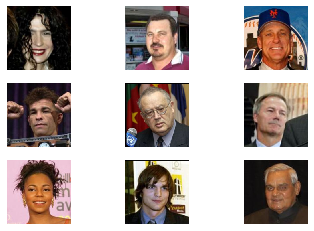

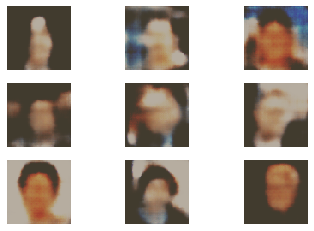

Epoch 41
Loss: 16.8837
Val Loss: 14.3790
Epoch 42
Loss: 16.6460
Val Loss: 14.2487
Epoch 43
Loss: 16.6316
Val Loss: 14.2234
Epoch 44
Loss: 15.9907
Val Loss: 14.2733
Epoch 45
Loss: 16.2275
Val Loss: 14.1408
ACC: 8.571%


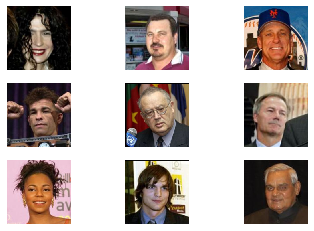

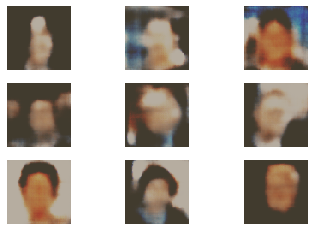

Epoch 46
Loss: 16.7756
Val Loss: 14.1179
Epoch 47
Loss: 16.4370
Val Loss: 14.0262
Epoch 48
Loss: 16.2656
Val Loss: 13.9473
Epoch 49
Loss: 15.9775
Val Loss: 13.8726
Epoch 50
Loss: 16.0738
Val Loss: 13.8698
ACC: 8.095%


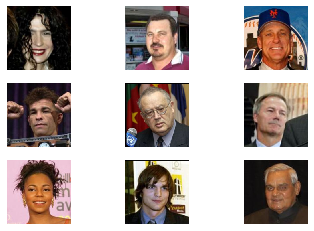

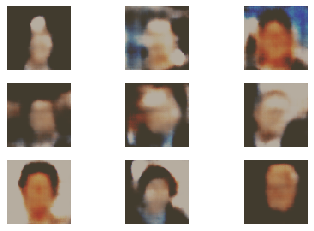

Epoch 51
Loss: 16.1594
Val Loss: 13.8481
Epoch 52
Loss: 16.2672
Val Loss: 14.0002
Epoch 53
Loss: 16.1215
Val Loss: 13.9010
Epoch 54
Loss: 16.2632
Val Loss: 13.7049
Epoch 55
Loss: 16.2151
Val Loss: 13.8368
ACC: 6.667%


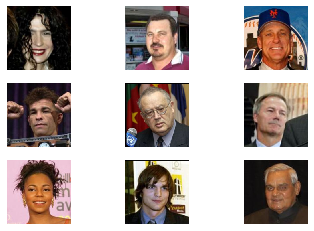

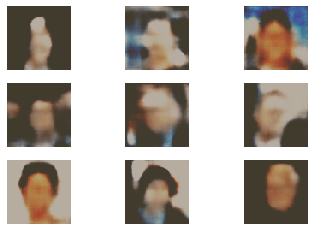

Epoch 56
Loss: 16.0451
Val Loss: 13.6035
Epoch 57
Loss: 16.1610
Val Loss: 13.6927
Epoch 58
Loss: 15.7566
Val Loss: 13.5934
Epoch 59
Loss: 16.1769
Val Loss: 13.6713
Epoch 60
Loss: 15.8457
Val Loss: 13.4838
ACC: 6.667%


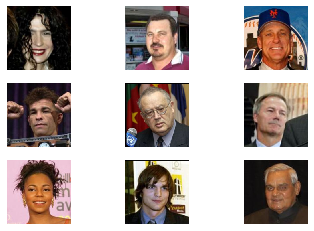

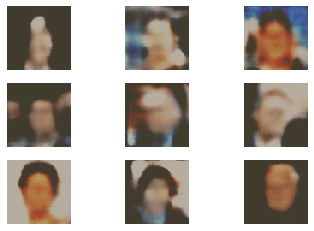

Epoch 61
Loss: 16.2327
Val Loss: 13.5526
Epoch 62
Loss: 15.8170
Val Loss: 13.4086
Epoch 63
Loss: 15.6669
Val Loss: 13.4116
Epoch 64
Loss: 16.1995
Val Loss: 13.3974
Epoch 65
Loss: 16.0046
Val Loss: 13.4184
ACC: 6.667%


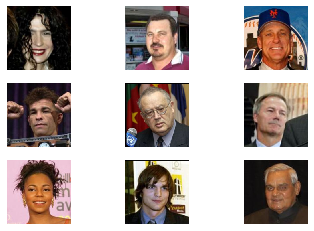

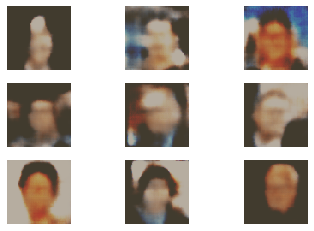

Epoch 66
Loss: 15.6081
Val Loss: 13.3757
Epoch 67
Loss: 15.6577
Val Loss: 13.2819
Epoch 68
Loss: 15.7793
Val Loss: 13.2928
Epoch 69
Loss: 15.3429
Val Loss: 13.3150
Epoch 70
Loss: 15.2597
Val Loss: 13.2996
ACC: 7.143%


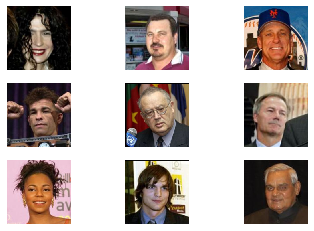

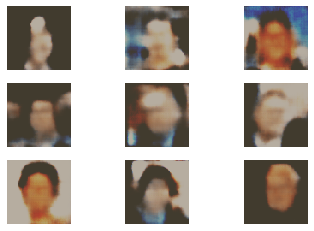

Epoch 71
Loss: 15.2653
Val Loss: 13.3831
Epoch 72
Loss: 15.5914
Val Loss: 13.2134
Epoch 73
Loss: 15.1859
Val Loss: 13.1692
Epoch 74
Loss: 15.3144
Val Loss: 13.2973
Epoch 75
Loss: 15.6888
Val Loss: 13.1642
ACC: 7.619%


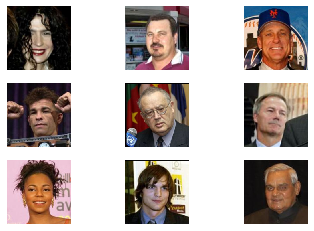

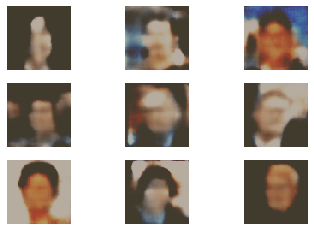

Epoch 76
Loss: 15.9259
Val Loss: 13.1810
Epoch 77
Loss: 15.5372
Val Loss: 13.0808
Epoch 78
Loss: 15.1264
Val Loss: 13.1083
Epoch 79
Loss: 14.9770
Val Loss: 13.0976
Epoch 80
Loss: 15.3145
Val Loss: 13.0996
ACC: 7.143%


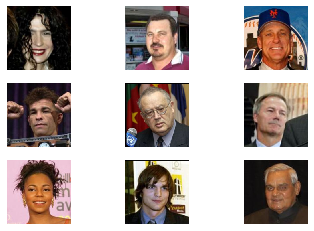

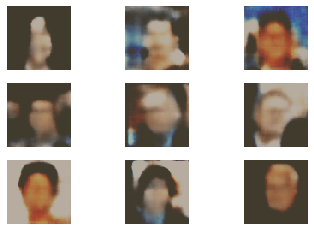

Epoch 81
Loss: 15.1198
Val Loss: 13.0143
Epoch 82
Loss: 15.0587
Val Loss: 13.1363
Epoch 83
Loss: 15.7091
Val Loss: 12.9979
Epoch 84
Loss: 15.4945
Val Loss: 13.1326
Epoch 85
Loss: 15.5812
Val Loss: 13.0514
ACC: 7.619%


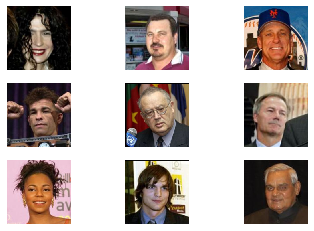

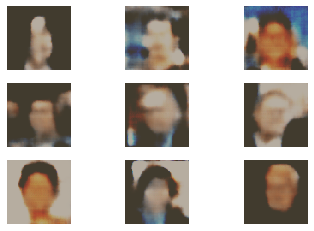

Epoch 86
Loss: 15.1185
Val Loss: 12.9637
Epoch 87
Loss: 15.1823
Val Loss: 13.1591
Epoch 88
Loss: 15.1321
Val Loss: 12.9093
Epoch 89
Loss: 15.0394
Val Loss: 12.9054
Epoch 90
Loss: 15.3551
Val Loss: 13.0039


In [ ]:
model = Autoencoder().to(device)
batch_size = 32
train_loader = torch.utils.data.DataLoader(lfw_limit.train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(lfw_limit.test_data, batch_size=batch_size, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
#criterion = nn.SmoothL1Loss()

for i in range(1,101):
    print("Epoch {}".format(i))
    
    model.train()
    running_loss = 0.0
    for index, (augments, clazz, attributes, images) in enumerate(train_loader):
        #images = images.to(device)
        augments = augments.to(device)
        optimizer.zero_grad()
        outputs = model(augments)
        loss = criterion(outputs, augments)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        
    epoch_loss = running_loss / len(train_loader)
    print('Loss: {:.4f}'.format(epoch_loss))
    
    running_val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for _, clazz, attributes, images in test_loader:
            images = images.to(device)
            outputs = model(images)
            loss = criterion(outputs, images)
            running_val_loss += loss.item() * images.size(0)
            
    val_loss = running_val_loss / len(test_loader)
    print('Val Loss: {:.4f}'.format(val_loss))
    
    if i % 5 == 0:
        auto_rep = AutoRepEval(model)
        print("ACC: {:.3f}%".format(evaluator_limit.eval_rep(auto_rep) * 100))

        lfw.plot_faces(images.cpu(), 3)
        lfw.plot_faces(outputs.cpu(), 3)

# Variational Autoencoder (VAE)

In [15]:
class VariationalAutoencoder(nn.Module):
    def __init__(self):
        super(VariationalAutoencoder, self).__init__()
        
        # input: batch x 3 x 224 x 224 -> batch x _ x 7 x 7
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=3, padding=2),  # b, 16, 76, 76
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # b, 16, 38, 38
            nn.Conv2d(32, 64, 3, stride=3, padding=2),  # b, 8, 14, 14
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # b, 8, 7, 7
            nn.Conv2d(64, 128, 3, stride=1, padding=1),  # b, 8, 14, 14
        )
        
        self.fc_mu = nn.Linear(128*7*7, 2000)  # mu layer
        self.fc_logvar = nn.Linear(128*7*7, 2000)  # logvariance layer
        self.fc_up = nn.Linear(2000, 128*7*7)
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=3),  # b, 16, 10, 10
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1),  # b, 8, 17, 17
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 6, stride=2, padding=0),  # b, 8, 38, 38
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 4, stride=2, padding=1),  # b, 8, 76, 76
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 3, 3, stride=3, padding=2),  # b, 3, 224, 224
            nn.Sigmoid()
        )
        
    def encode(self, x):
        out = self.encoder(x)
        out = out.view(-1, 128*7*7)
        return self.fc_mu(out), self.fc_logvar(out)
    
    def decode(self, x):
        out = self.fc_up(x)
        out = out.view(-1, 128, 7, 7)
        return self.decoder(out)
        
    def forward(self, x):
        enc = self.encode(x)
        out = self.reparameterize(enc[0], enc[1])
        dec = self.decode(out)
        return dec
    
    def reparameterize(self, mu, logvar):
        """THE REPARAMETERIZATION IDEA:

        For each training sample (we get 128 batched at a time)

        - take the current learned mu, stddev for each of the ZDIMS
          dimensions and draw a random sample from that distribution
        - the whole network is trained so that these randomly drawn
          samples decode to output that looks like the input
        - which will mean that the std, mu will be learned
          *distributions* that correctly encode the inputs
        - due to the additional KLD term (see loss_function() below)
          the distribution will tend to unit Gaussians

        Parameters
        ----------
        mu : [128, ZDIMS] mean matrix
        logvar : [128, ZDIMS] variance matrix

        Returns
        -------

        During training random sample from the learned ZDIMS-dimensional
        normal distribution; during inference its mean.

        """

        if self.training:
            # multiply log variance with 0.5, then in-place exponent
            # yielding the standard deviation
            std = logvar.mul(0.5).exp_()  # type: Variable
            # - std.data is the [128,ZDIMS] tensor that is wrapped by std
            # - so eps is [128,ZDIMS] with all elements drawn from a mean 0
            #   and stddev 1 normal distribution that is 128 samples
            #   of random ZDIMS-float vectors
            eps = std.data.new(std.size()).normal_().clone().detach()
            # - sample from a normal distribution with standard
            #   deviation = std and mean = mu by multiplying mean 0
            #   stddev 1 sample with desired std and mu, see
            #   https://stats.stackexchange.com/a/16338
            # - so we have 128 sets (the batch) of random ZDIMS-float
            #   vectors sampled from normal distribution with learned
            #   std and mu for the current input
            return eps.mul(std).add_(mu)

        else:
            # During inference, we simply spit out the mean of the
            # learned distribution for the current input.  We could
            # use a random sample from the distribution, but mu of
            # course has the highest probability.
            return mu

In [16]:
class AutoRepEval:
    def __init__(self, model):
        self.model = model

    def eval(self):
        self.model.eval()
    
    def __call__(self, image):
        out = self.model.encode(image)
        #return torch.cat(out, dim=1)
        return out[0].clone().detach()

In [17]:
model = VariationalAutoencoder()
model(lfw_limit.train_data[0][0].unsqueeze(0))
e = AutoRepEval(model)
e(lfw_limit.train_data[0][0].unsqueeze(0)).shape

torch.Size([1, 2000])

Epoch 1
Loss: 50.1948
Val Loss: 40.9843
Epoch 2
Loss: 40.8822
Val Loss: 34.4431
Epoch 3
Loss: 36.6027
Val Loss: 31.4159
Epoch 4
Loss: 31.7445
Val Loss: 25.2434
Epoch 5
Loss: 27.3545
Val Loss: 21.6482
ACC: 8.095%


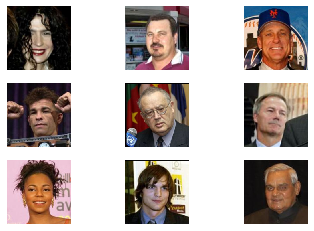

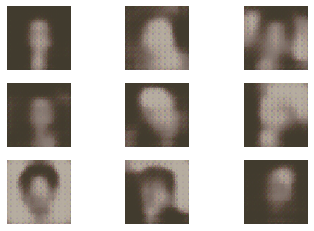

Epoch 6
Loss: 24.5560
Val Loss: 20.4137
Epoch 7
Loss: 23.0722
Val Loss: 19.5581
Epoch 8
Loss: 22.3958
Val Loss: 19.0379
Epoch 9
Loss: 21.3369
Val Loss: 18.5031
Epoch 10
Loss: 21.4319
Val Loss: 18.4538
ACC: 10.000%


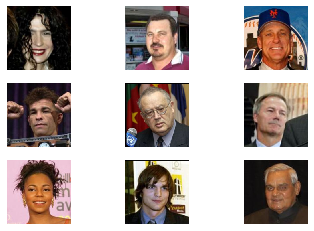

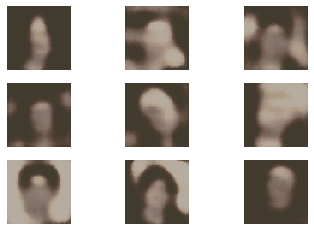

Epoch 11
Loss: 20.9811
Val Loss: 17.8758
Epoch 12
Loss: 20.6980
Val Loss: 17.6215
Epoch 13
Loss: 19.5362
Val Loss: 17.4580
Epoch 14
Loss: 19.7259
Val Loss: 17.0127
Epoch 15
Loss: 19.8224
Val Loss: 16.7355
ACC: 10.952%


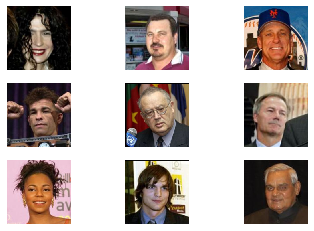

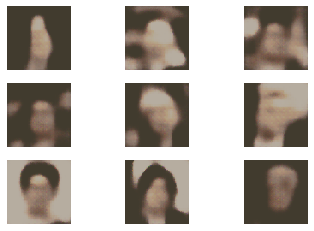

Epoch 16
Loss: 19.7778
Val Loss: 16.4967
Epoch 17
Loss: 19.2169
Val Loss: 16.4944
Epoch 18
Loss: 18.7363
Val Loss: 16.2039
Epoch 19
Loss: 18.9515
Val Loss: 15.9803
Epoch 20
Loss: 18.8720
Val Loss: 15.9037
ACC: 10.000%


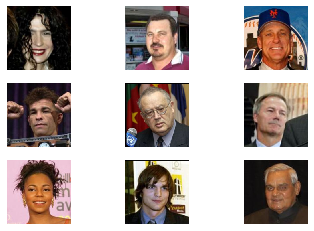

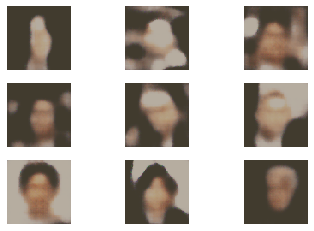

Epoch 21
Loss: 18.5154
Val Loss: 15.7208
Epoch 22
Loss: 18.3383
Val Loss: 15.6700
Epoch 23
Loss: 18.3639
Val Loss: 15.5398
Epoch 24
Loss: 18.2014
Val Loss: 15.1737
Epoch 25
Loss: 17.6151
Val Loss: 15.0010
ACC: 10.952%


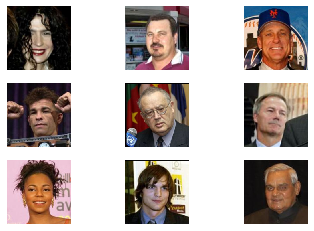

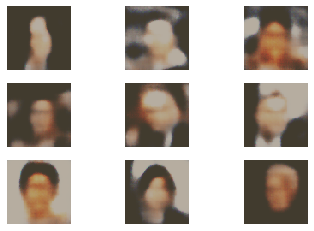

Epoch 26
Loss: 17.4847
Val Loss: 14.7946
Epoch 27
Loss: 17.2427
Val Loss: 14.8277
Epoch 28
Loss: 17.1464
Val Loss: 14.5032
Epoch 29
Loss: 16.6969
Val Loss: 14.4082
Epoch 30
Loss: 16.7753
Val Loss: 14.4247
ACC: 10.000%


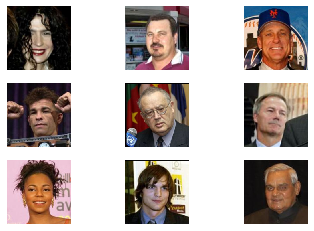

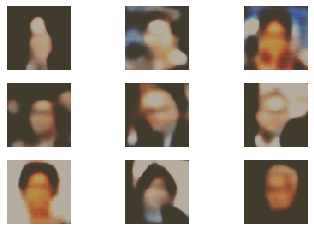

Epoch 31
Loss: 16.9823
Val Loss: 14.2766
Epoch 32
Loss: 16.3626
Val Loss: 14.1420
Epoch 33
Loss: 16.0625
Val Loss: 14.0889
Epoch 34
Loss: 16.4699
Val Loss: 14.0043
Epoch 35
Loss: 16.5945
Val Loss: 14.0589
ACC: 11.429%


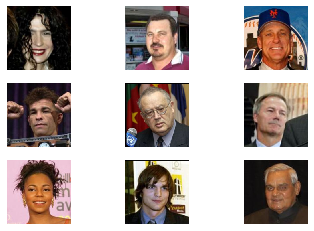

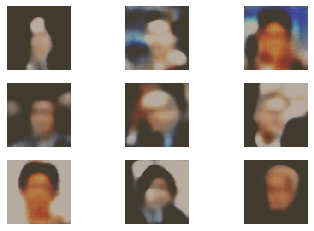

Epoch 36
Loss: 15.9391
Val Loss: 13.9305
Epoch 37
Loss: 16.0841
Val Loss: 13.8176
Epoch 38
Loss: 16.1796
Val Loss: 13.7669
Epoch 39
Loss: 15.9144
Val Loss: 13.6483
Epoch 40
Loss: 15.4447
Val Loss: 13.6795
ACC: 10.952%


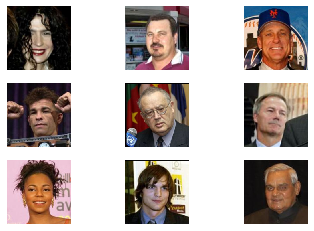

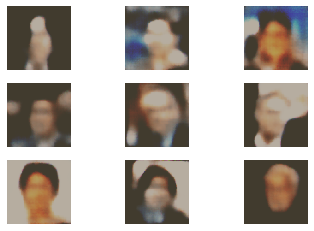

Epoch 41
Loss: 16.1128
Val Loss: 13.6055
Epoch 42
Loss: 15.8075
Val Loss: 13.8157
Epoch 43
Loss: 16.1054
Val Loss: 13.8058
Epoch 44
Loss: 16.0404
Val Loss: 13.6395
Epoch 45
Loss: 15.6988
Val Loss: 13.6476
ACC: 10.000%


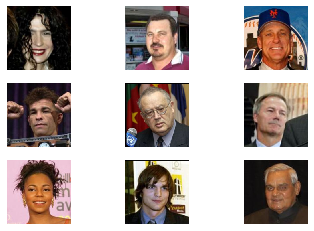

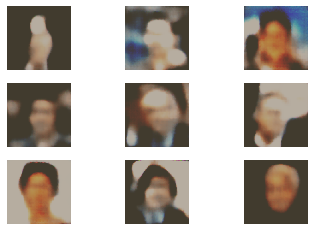

Epoch 46
Loss: 16.4311
Val Loss: 13.4560
Epoch 47
Loss: 15.7859
Val Loss: 13.4436
Epoch 48
Loss: 15.5596
Val Loss: 13.4112
Epoch 49
Loss: 15.5093
Val Loss: 13.4555
Epoch 50
Loss: 15.2613
Val Loss: 13.2992
ACC: 11.429%


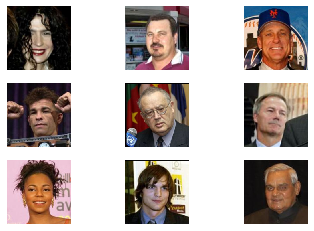

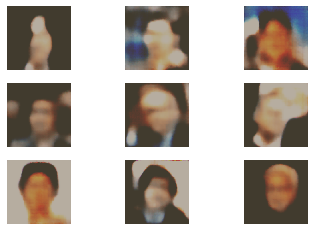

Epoch 51
Loss: 15.6393
Val Loss: 13.3666
Epoch 52
Loss: 15.2807
Val Loss: 13.2208
Epoch 53
Loss: 15.1310
Val Loss: 13.2453
Epoch 54
Loss: 15.6952
Val Loss: 13.1367
Epoch 55
Loss: 15.0783
Val Loss: 13.1366
ACC: 11.429%


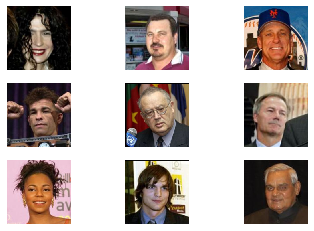

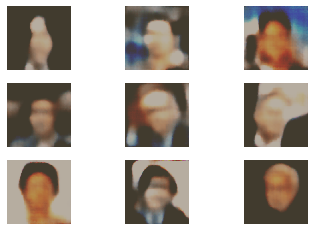

Epoch 56
Loss: 15.3548
Val Loss: 13.0863
Epoch 57
Loss: 15.3988
Val Loss: 13.2055
Epoch 58
Loss: 15.0150
Val Loss: 13.0906
Epoch 59
Loss: 14.9019
Val Loss: 13.0575
Epoch 60
Loss: 15.1200
Val Loss: 13.0188
ACC: 10.476%


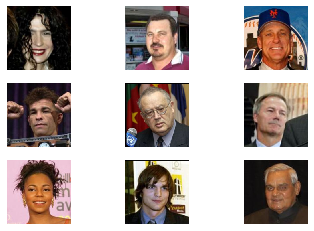

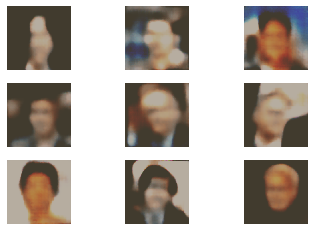

Epoch 61
Loss: 15.2055
Val Loss: 13.0040
Epoch 62
Loss: 14.8831
Val Loss: 13.0143
Epoch 63
Loss: 14.8962
Val Loss: 12.9576
Epoch 64
Loss: 15.5568
Val Loss: 13.1287
Epoch 65
Loss: 15.0314
Val Loss: 13.2319
ACC: 10.476%


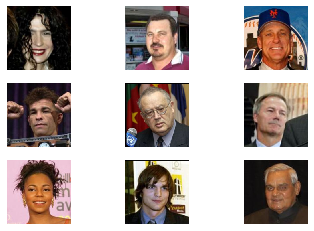

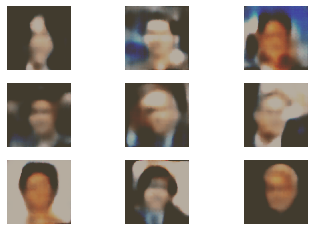

Epoch 66
Loss: 15.3820
Val Loss: 13.0459
Epoch 67
Loss: 14.8518
Val Loss: 12.8945
Epoch 68
Loss: 14.8171
Val Loss: 12.8770
Epoch 69
Loss: 14.8563
Val Loss: 12.8244
Epoch 70
Loss: 15.4753
Val Loss: 12.8069
ACC: 10.476%


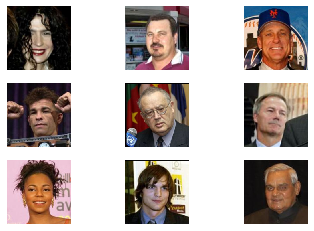

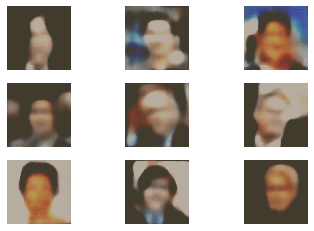

Epoch 71
Loss: 15.0081
Val Loss: 12.8354
Epoch 72
Loss: 15.0553
Val Loss: 12.8684
Epoch 73
Loss: 15.0874
Val Loss: 12.8282
Epoch 74
Loss: 14.9733
Val Loss: 12.7985
Epoch 75
Loss: 15.1290
Val Loss: 12.8548
ACC: 10.476%


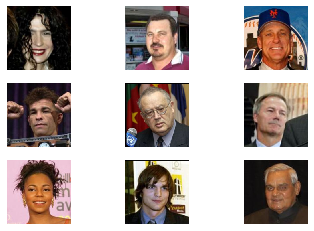

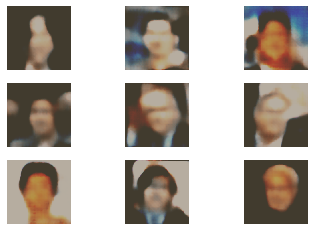

Epoch 76
Loss: 15.3588
Val Loss: 13.0331
Epoch 77
Loss: 15.4750
Val Loss: 12.7701
Epoch 78
Loss: 15.0245
Val Loss: 12.7549
Epoch 79
Loss: 14.8302
Val Loss: 12.7586
Epoch 80
Loss: 14.9335
Val Loss: 12.8295
ACC: 10.000%


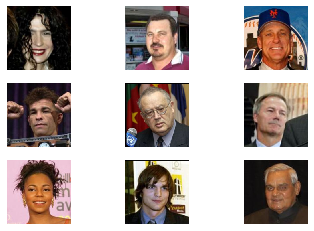

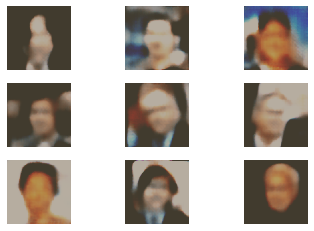

Epoch 81
Loss: 14.9248
Val Loss: 12.6885
Epoch 82
Loss: 14.9058
Val Loss: 12.6357
Epoch 83
Loss: 14.9076
Val Loss: 12.6984
Epoch 84
Loss: 14.7256
Val Loss: 12.6265
Epoch 85
Loss: 14.6898
Val Loss: 12.7635
ACC: 10.000%


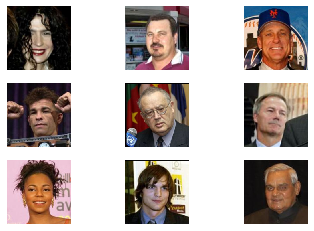

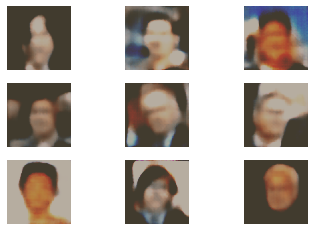

Epoch 86
Loss: 14.8037
Val Loss: 12.6618
Epoch 87
Loss: 14.6901
Val Loss: 12.6455
Epoch 88
Loss: 14.3704
Val Loss: 12.5865
Epoch 89
Loss: 14.4746
Val Loss: 12.5848
Epoch 90
Loss: 14.5885
Val Loss: 12.5601
ACC: 10.952%


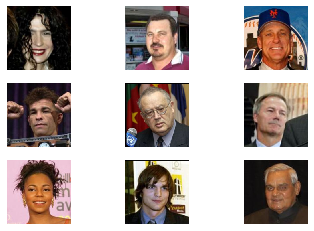

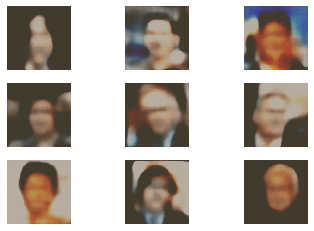

Epoch 91
Loss: 14.4522
Val Loss: 12.5835
Epoch 92
Loss: 14.3342
Val Loss: 12.5682
Epoch 93
Loss: 14.5759
Val Loss: 12.5725
Epoch 94
Loss: 14.2951
Val Loss: 12.5221
Epoch 95
Loss: 14.7755
Val Loss: 12.5559
ACC: 9.524%


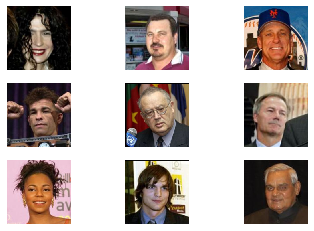

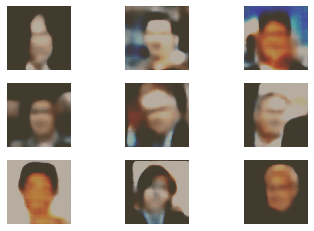

Epoch 96
Loss: 14.1097
Val Loss: 12.5264
Epoch 97
Loss: 14.7065
Val Loss: 12.5020
Epoch 98
Loss: 14.5651
Val Loss: 12.4748
Epoch 99
Loss: 14.3440
Val Loss: 12.4830
Epoch 100
Loss: 14.5799
Val Loss: 12.5824
ACC: 10.476%


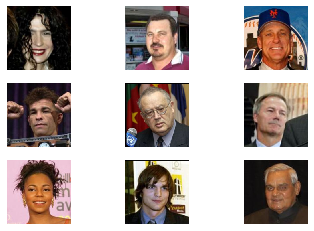

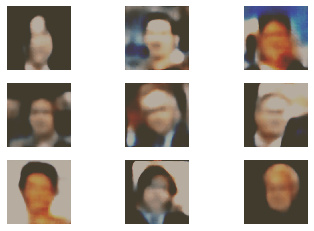

In [18]:
model = VariationalAutoencoder().to(device)
batch_size = 32
train_loader = torch.utils.data.DataLoader(lfw_limit.train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(lfw_limit.test_data, batch_size=batch_size, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
#criterion = nn.SmoothL1Loss()

for i in range(1,101):
    print("Epoch {}".format(i))
    
    model.train()
    running_loss = 0.0
    for index, (augments, clazz, attributes, images) in enumerate(train_loader):
        #images = images.to(device)
        augments = augments.to(device)
        optimizer.zero_grad()
        outputs = model(augments)
        loss = criterion(outputs, augments)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        
    epoch_loss = running_loss / len(train_loader)
    print('Loss: {:.4f}'.format(epoch_loss))
    
    running_val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for _, clazz, attributes, images in test_loader:
            images = images.to(device)
            outputs = model(images)
            loss = criterion(outputs, images)
            running_val_loss += loss.item() * images.size(0)
            
    val_loss = running_val_loss / len(test_loader)
    print('Val Loss: {:.4f}'.format(val_loss))
    
    if i % 5 == 0:
        auto_rep = AutoRepEval(model)
        print("ACC: {:.3f}%".format(evaluator_limit.eval_rep(auto_rep) * 100))

        lfw.plot_faces(images.cpu(), 3)
        lfw.plot_faces(outputs.cpu(), 3)

# Beta VAE

In [28]:
class BetaVAE(nn.Module):
    def __init__(self):
        super(BetaVAE, self).__init__()
        
        # input: batch x 3 x 224 x 224 -> batch x _ x 7 x 7
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=3, padding=2),  # b, 16, 76, 76
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # b, 16, 38, 38
            nn.Conv2d(32, 64, 3, stride=3, padding=2),  # b, 8, 14, 14
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # b, 8, 7, 7
            nn.Conv2d(64, 128, 3, stride=1, padding=1),  # b, 8, 14, 14
        )
        
        self.fc_mu = nn.Linear(128*7*7, 2000)  # mu layer
        self.fc_logvar = nn.Linear(128*7*7, 2000)  # logvariance layer
        self.fc_up = nn.Linear(2000, 128*7*7)
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=3),  # b, 16, 10, 10
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1),  # b, 8, 17, 17
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 6, stride=2, padding=0),  # b, 8, 38, 38
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 4, stride=2, padding=1),  # b, 8, 76, 76
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 3, 3, stride=3, padding=2),  # b, 3, 224, 224
            nn.Sigmoid()
        )
        
    def encode(self, x):
        out = self.encoder(x)
        out = out.view(-1, 128*7*7)
        return self.fc_mu(out), self.fc_logvar(out)
    
    def decode(self, x):
        out = self.fc_up(x)
        out = out.view(-1, 128, 7, 7)
        return self.decoder(out)
        
    def forward(self, x):
        enc = self.encode(x)
        out = self.reparameterize(enc[0], enc[1])
        dec = self.decode(out)
        return dec, enc[0], enc[1]
    
    def reparameterize(self, mu, logvar):
        """THE REPARAMETERIZATION IDEA:

        For each training sample (we get 128 batched at a time)

        - take the current learned mu, stddev for each of the ZDIMS
          dimensions and draw a random sample from that distribution
        - the whole network is trained so that these randomly drawn
          samples decode to output that looks like the input
        - which will mean that the std, mu will be learned
          *distributions* that correctly encode the inputs
        - due to the additional KLD term (see loss_function() below)
          the distribution will tend to unit Gaussians

        Parameters
        ----------
        mu : [128, ZDIMS] mean matrix
        logvar : [128, ZDIMS] variance matrix

        Returns
        -------

        During training random sample from the learned ZDIMS-dimensional
        normal distribution; during inference its mean.

        """

        if self.training:
            # multiply log variance with 0.5, then in-place exponent
            # yielding the standard deviation
            std = logvar.mul(0.5).exp_()  # type: Variable
            # - std.data is the [128,ZDIMS] tensor that is wrapped by std
            # - so eps is [128,ZDIMS] with all elements drawn from a mean 0
            #   and stddev 1 normal distribution that is 128 samples
            #   of random ZDIMS-float vectors
            eps = std.data.new(std.size()).normal_().clone().detach()
            # - sample from a normal distribution with standard
            #   deviation = std and mean = mu by multiplying mean 0
            #   stddev 1 sample with desired std and mu, see
            #   https://stats.stackexchange.com/a/16338
            # - so we have 128 sets (the batch) of random ZDIMS-float
            #   vectors sampled from normal distribution with learned
            #   std and mu for the current input
            return eps.mul(std).add_(mu)

        else:
            # During inference, we simply spit out the mean of the
            # learned distribution for the current input.  We could
            # use a random sample from the distribution, but mu of
            # course has the highest probability.
            return mu

In [38]:
def reconstruction_loss(x, x_recon, distribution):
    batch_size = x.size(0)
    assert batch_size != 0

    if distribution == 'bernoulli':
        recon_loss = F.binary_cross_entropy_with_logits(x_recon, x, size_average=False).div(batch_size)
    elif distribution == 'gaussian':
        #x_recon = F.sigmoid(x_recon)
        recon_loss = F.mse_loss(x_recon, x, size_average=False).div(batch_size)
    else:
        recon_loss = None

    return recon_loss


def kl_divergence(mu, logvar):
    batch_size = mu.size(0)
    assert batch_size != 0
    if mu.data.ndimension() == 4:
        mu = mu.view(mu.size(0), mu.size(1))
    if logvar.data.ndimension() == 4:
        logvar = logvar.view(logvar.size(0), logvar.size(1))

    klds = -0.5*(1 + logvar - mu.pow(2) - logvar.exp())
    total_kld = klds.sum(1).mean(0, True)
    dimension_wise_kld = klds.mean(0)
    mean_kld = klds.mean(1).mean(0, True)

    return total_kld, dimension_wise_kld, mean_kld

Epoch 1
Loss: 254637.3061
Val Loss: 217553.4032
Epoch 2
Loss: 213459.8805
Val Loss: 205775.9537
Epoch 3
Loss: 209533.5196
Val Loss: 204661.7449
Epoch 4
Loss: 207909.5246
Val Loss: 198616.1898
Epoch 5
Loss: 202012.9622
Val Loss: 194699.9667
ACC: 2.306%


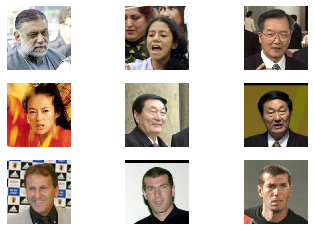

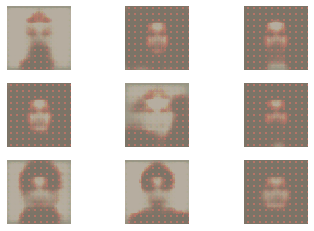

Epoch 6


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Loss: 200009.4647
Val Loss: 193144.5701
Epoch 7


In [ ]:
model = BetaVAE().to(device)
beta = 2
batch_size = 32
train_loader = torch.utils.data.DataLoader(lfw.train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(lfw.test_data, batch_size=batch_size, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

for i in range(1,101):
    print("Epoch {}".format(i))
    
    model.train()
    running_loss = 0.0
    for index, (augments, clazz, attributes, images) in enumerate(train_loader):
        images = images.to(device)
        augments = augments.to(device)
        optimizer.zero_grad()
        outputs, mu, logvar = model(augments)
        
        recon_loss = reconstruction_loss(images, outputs, 'gaussian')
        total_kld, dim_wise_kld, mean_kld = kl_divergence(mu, logvar)
        beta_vae_loss = recon_loss + beta*total_kld
        #C = torch.clamp(self.C_max/self.C_stop_iter*self.global_iter, 0, self.C_max.data[0])
        #beta_vae_loss = recon_loss + self.gamma*(total_kld-C).abs()
            
        beta_vae_loss.backward()
        optimizer.step()
        
        running_loss += beta_vae_loss.item()
        
    epoch_loss = running_loss / len(train_loader)
    print('Loss: {:.4f}'.format(epoch_loss))
    
    running_val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for _, clazz, attributes, images in test_loader:
            images = images.to(device)
            outputs, mu, logvar = model(images)
            
            recon_loss = reconstruction_loss(images, outputs, 'gaussian')
            total_kld, dim_wise_kld, mean_kld = kl_divergence(mu, logvar)
            beta_vae_loss = recon_loss + beta*total_kld
            
            running_val_loss += beta_vae_loss.item()
    
    val_loss = running_val_loss / len(test_loader)
    print('Val Loss: {:.4f}'.format(val_loss))
    
    if i % 5 == 0:
        auto_rep = AutoRepEval(model)
        print("ACC: {:.3f}%".format(evaluator.eval_rep(auto_rep) * 100))

        lfw.plot_faces(images.cpu(), 3)
        lfw.plot_faces(outputs.cpu(), 3)

# Visualize prediction

In [29]:
auto_rep = AutoRepEval(model)
print("ACC: {:.3f}%".format(evaluator_limit.eval_rep(auto_rep) * 100))

ACC: 9.524%


In [ ]:
import random
indices = random.sample(range(len(lfw_limit.test_data)), 9)

images = torch.stack([lfw.test_data[i][3] for i in indices])
classes = evaluator_limit.predict(images)

class_images = [lfw.get_images(i) for i in classes]

print([lfw.test_data[i][1] for i in indices])
print("true images")
lfw.plot_faces(images, 3)
print(classes)
print("predicted class representatives")
lfw.plot_faces(class_images, 3)

In [9]:
!nvidia-smi

Wed Jan  8 14:28:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro M4000        On   | 00000000:00:05.0 Off |                  N/A |
| 52%   54C    P0    45W / 120W |   8114MiB /  8126MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0)
Unpacking objects: 100% (4/4), done.
From https://git.scc.kit.edu/uydvo/facerecognition
   46bb677..b885c97  master     -> origin/master
Updating 46bb677..b885c97
Fast-forward
 src/lfw.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
